In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr, entropy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Data = pd.read_csv('GPSData.csv')
Data = pd.read_csv('GPSandClinicalData.csv')

In [3]:
Data.head()

,Wear Frac,DestinationType,Distance,Duration,Mean Speed,TripDuration,Relative_Freq,Relative_Duration,SubjID,NewBrace,Age,Diagnosis,BaselineYrs,6mwt,10mwt_ss,10mwt_fast,Mean Lat,Mean Lon,LocID
0,0.015000,Res,12.229512,2.772222,0.215601,0.017824,0.014925,0.021452,CBR21,1,65,poliomyelitis,60.0,231.93,0.69,0.85,41.732207,-88.132441,2
1,0.063091,Inst,6.302016,1.758333,0.230411,0.011921,0.014925,0.013607,CBR21,1,65,poliomyelitis,60.0,231.93,0.69,0.85,41.783632,-88.188553,3
2,0.000000,Com,5.095353,1.016389,0.591493,0.008218,0.014925,0.007865,CBR21,1,65,poliomyelitis,60.0,231.93,0.69,0.85,41.765985,-88.206360,4
3,0.000000,Com,5.172335,0.366111,1.607549,0.001505,0.029851,0.004252,CBR21,1,65,poliomyelitis,60.0,231.93,0.69,0.85,41.760925,-88.208135,5
4,0.000000,Com,2.871296,0.052778,4.483316,0.003704,0.044776,0.001827,CBR21,1,65,poliomyelitis,60.0,231.93,0.69,0.85,41.760981,-88.242395,6


In [4]:
len(Data)

2181

In [5]:
Data.columns

Index(['Wear Frac', 'DestinationType', 'Distance', 'Duration', 'Mean Speed',
       'TripDuration', 'Relative_Freq', 'Relative_Duration', 'SubjID',
       'NewBrace', 'Age', 'Diagnosis', 'BaselineYrs', '6mwt', '10mwt_ss',
       '10mwt_fast', 'Mean Lat', 'Mean Lon', 'LocID'],
      dtype='object')

In [6]:
for s in Data['SubjID'].unique():
    lat=Data.loc[(Data['SubjID']==s)&(Data['NewBrace']==1),'Mean Lat']
    lon=Data.loc[(Data['SubjID']==s)&(Data['NewBrace']==1),'Mean Lon']
    locvar=np.log(np.var(lat)+np.var(lon))
    print(s,locvar)

CBR21 1.50733182426
CBR30 -1.79845309713
CBR22 -0.853575022274
CBR27 -4.81679906589
CBR26 -4.42196489636
CBR11 -6.07875192639
CBR16 -3.23282568718
CBR28 -2.87019739538
CBR15 6.63558903507
CBR25 -4.07392611008
CBR19 -2.59472203305
CBR08 -5.67261584433
CBR24 -5.04049960067
CBR31 -3.59248688978


In [7]:
newbrace = 1
for s in Data.SubjID.unique():
    Data_ = Data[(Data['SubjID']==s)&(Data['NewBrace']==newbrace)]
    
    print(s,np.sum(np.unique(Data_['Relative_Duration'])),len(np.unique(Data_['Relative_Duration'])), len(np.unique(Data_['LocID'])))


CBR21 1.0 39 39
CBR30 0.997640757508 82 83
CBR22 0.999185655695 28 29
CBR27 1.0 2 2
CBR26 0.990781177452 30 33
CBR11 0.996556359807 52 57
CBR16 0.997422727858 30 31
CBR28 1.0 4 4
CBR15 1.0 11 11
CBR25 1.0 12 12
CBR19 1.0 4 4
CBR08 0.992913777914 24 25
CBR24 1.0 20 20
CBR31 0.995418374729 19 20


In [8]:
Featsubj = pd.DataFrame(data=[],columns=['SubjID','NewBrace','Nlocs','LocVar','MedianDur','MedianSpd',
                                         'MeanDistHome','top2RelDur','Entropy', 'Age', 'BaselineYrs', '6mWT', '10mWTss',
                                         '10mWTfast','WearFrac'])

In [9]:
ind = 0
for newbrace in Data.NewBrace.unique():
    for s in Data.SubjID.unique():
        ind+=1
        Data_ = Data[(Data['SubjID']==s)&(Data['NewBrace']==newbrace)]
        
        nlocs = len(Data_['LocID'].unique())
        
        locvar=np.log(np.var(Data_['Mean Lat']) + np.var(Data_['Mean Lon']))        
        
        medDur = Data_['Duration'].median() #*24 #HOURS
        
        medSpd = Data_['Mean Speed'].median()
  
        meanDistHome = Data_['Distance'].mean()/1000
        
        top2RelDur = np.sum(np.unique(Data_['Relative_Duration'])[-2:])
        
        Entropy = entropy(np.unique(Data_['Relative_Duration']))

        WearFrac = np.nansum(Data_['Wear Frac']*Data_['Duration'])/(np.nansum(Data_['Duration'])+1e-16)

        
        fpd=(pd.DataFrame({'SubjID':s,'NewBrace':newbrace,'Nlocs':nlocs,'LocVar':locvar,'MedianDur':medDur,
                         'MedianSpd':medSpd,'MeanDistHome':meanDistHome, 'top2RelDur':top2RelDur,'Entropy':Entropy,
                          'Age':Data_['Age'].unique(), 'BaselineYrs': Data_['BaselineYrs'].unique(), 
                          '6mWT':Data_['6mwt'].unique(), '10mWTss':Data_['10mwt_ss'].unique(), 
                          '10mWTfast':Data_['10mwt_fast'].unique(),'WearFrac':WearFrac},index=[ind]))
    
        Featsubj=pd.concat([Featsubj,fpd])

    

In [10]:
Featsubj.head()

,10mWTfast,10mWTss,6mWT,Age,BaselineYrs,Entropy,LocVar,MeanDistHome,MedianDur,MedianSpd,NewBrace,Nlocs,SubjID,WearFrac,top2RelDur
1,0.85,0.69,231.93,65,60.0,2.061553,1.507332,0.107750,0.661944,1.015304,1,39,CBR21,0.007118,0.665099
2,1.47,1.20,452.17,55,37.0,2.853499,-1.798453,0.021663,0.411111,0.921783,1,83,CBR30,0.910122,0.471777
3,1.20,1.00,332.61,28,2.0,1.817652,-0.853575,0.022623,0.511111,0.828132,1,29,CBR22,0.241715,0.686630
4,0.63,0.46,133.60,72,70.0,0.471462,-4.816799,0.007647,0.491389,2.330390,1,2,CBR27,1.000000,1.000000
5,1.58,1.15,512.14,52,0.5,2.367757,-4.421965,0.005246,0.224167,0.658080,1,33,CBR26,0.896616,0.506524


## Cbrace vs Baseline features

In [31]:
stats.linregress(np.random.rand(10),np.random.rand(10))

LinregressResult(slope=0.66889760104374685, intercept=0.12365489208401903, rvalue=0.43745858218189859, pvalue=0.20611986458670406, stderr=0.4861302267553167)

In [41]:
x.values.astype('float32')

array([  58.,   94.,   28.,   29.,  140.,   74.,   46.,   23.,   49.,
         31.,    7.,   58.,   34.,   30.], dtype=float32)

Nlocs -0.578935556418 5.34527470923 0.0016782007475
LocVar -0.531878963773 -1.19776663862 0.103370654087
MedianDur -0.201362204176 0.175535654323 0.635069456775
MedianSpd -0.562690141655 0.704540873557 0.216428408272
Entropy -0.62774182575 0.918208249672 0.0107559318576
6mWT -0.158951904202 113.820838089 0.375657883993
10mWTss -0.30968615094 0.385490103296 0.128500300263
WearFrac -0.549390146343 0.307511505911 0.0890553867839


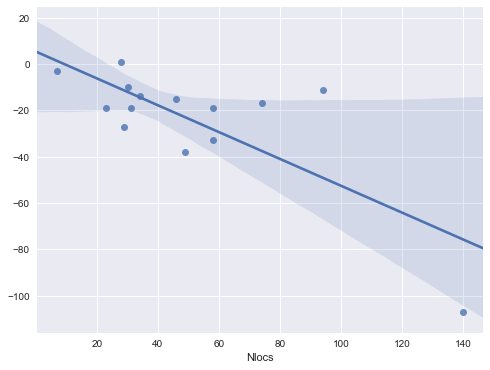

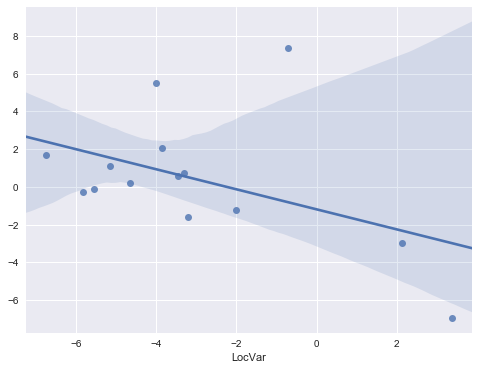

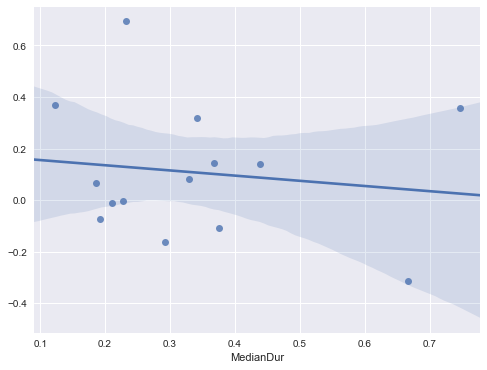

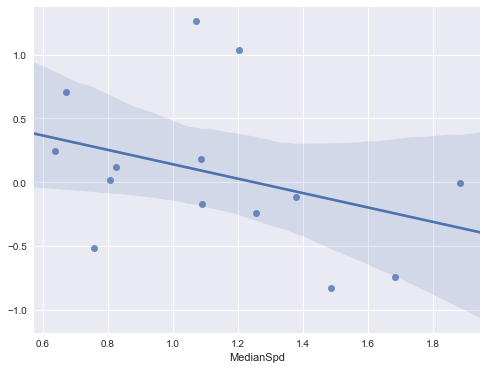

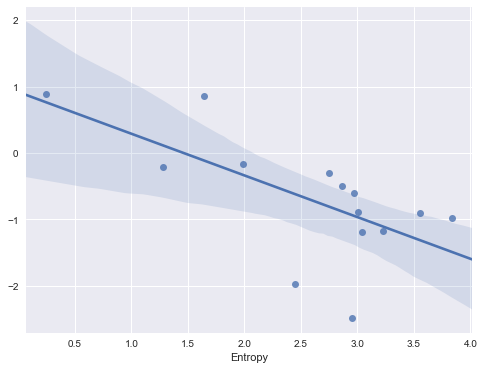

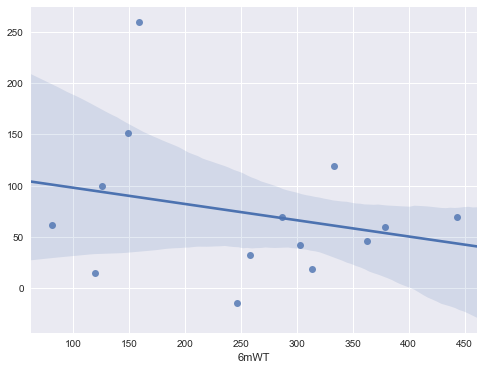

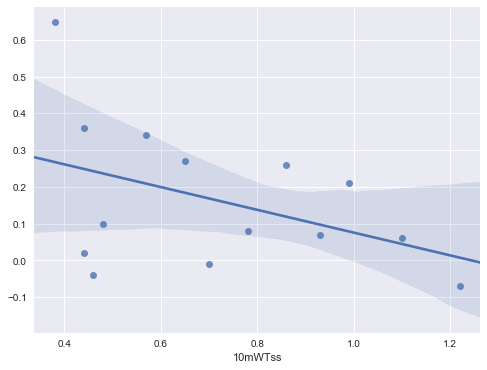

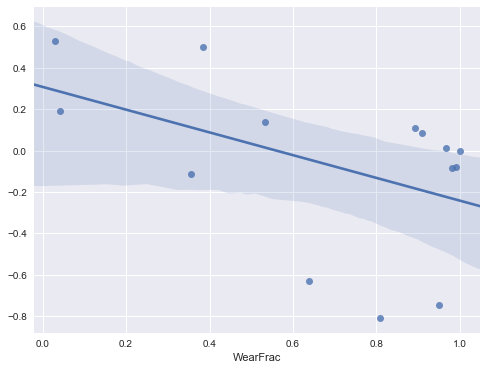

In [43]:
from scipy import stats
features = ['Nlocs','LocVar','MedianDur','MedianSpd','Entropy','6mWT','10mWTss','WearFrac']
outcome = ['WearFrac']

for f in features:
    x = Featsubj[Featsubj['NewBrace']==0][f]
    y = Featsubj[Featsubj['NewBrace']==1][f]
    x-y
    slope, intercept, r_value, p_value, std_err = stats.linregress(x.values.astype('float32'),(y.values-x.values).astype('float32'))
    print(f, slope,intercept,p_value)
    plt.figure(figsize=(8,6))
    sns.regplot(x.astype('float32'),(y.values-x.values).astype('float32'))

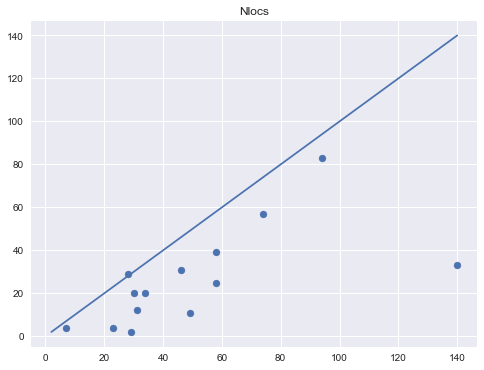

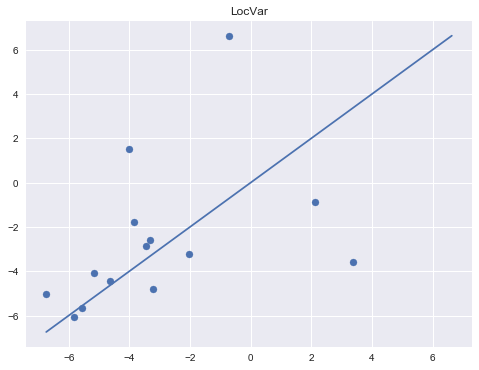

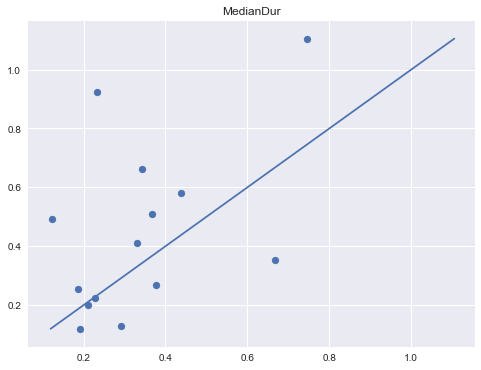

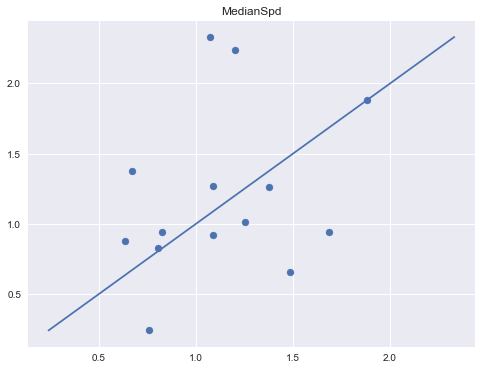

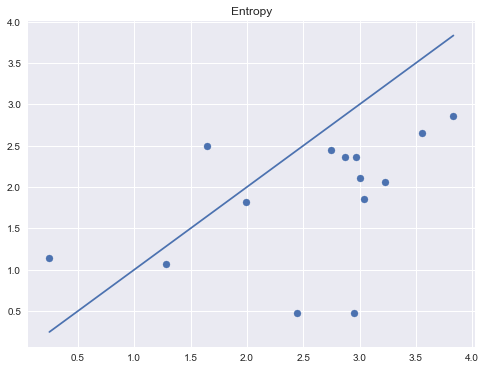

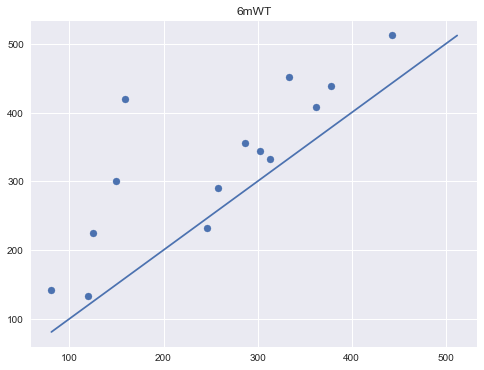

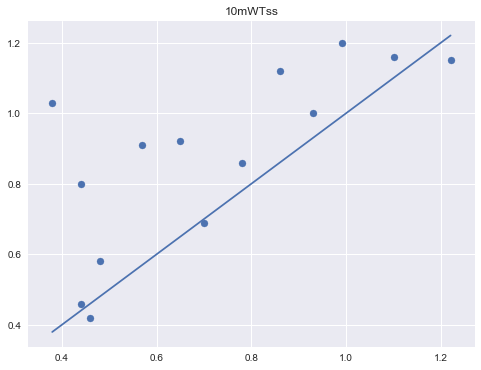

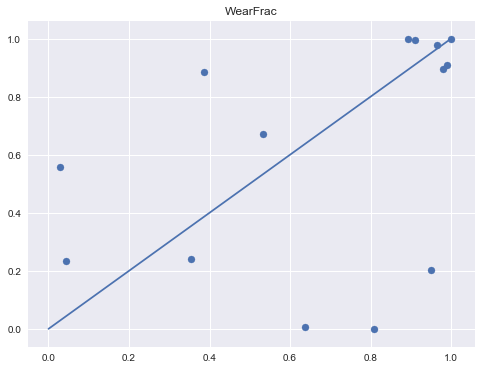

In [44]:
features = ['Nlocs','LocVar','MedianDur','MedianSpd','Entropy','6mWT','10mWTss','WearFrac']
outcome = ['WearFrac']

for f in features:
    x = Featsubj[Featsubj['NewBrace']==0][f]
    y = Featsubj[Featsubj['NewBrace']==1][f]
    plt.figure(figsize=(8,6))
    plt.scatter(x,y)    
    mx=min(x)
    my=min(y)
    m = min(mx,my)
    Mx=max(x)
    My=max(y)
    M =max(Mx,My)
    plt.plot([m,M],[m,M])
    plt.title(f)
    if f == 'MeanDistHome':
        plt.xlim([-10,200])
        plt.ylim([-10,200])
    
    


The more the features between braces are correlated, the more the behavior with the Cbrace is similar to that of the Baseline

In [62]:
#shapiro test for normality - sanity check
for i in range(1,4):
    n = 10**i
    x = np.random.randn(n)
    y = np.random.randn(n)
    fstat,pval = shapiro(x-y)
    print(n,fstat,pval)

10 0.9610961675643921 0.7982965111732483
100 0.993470311164856 0.9147432446479797
1000 0.9983134269714355 0.43921351432800293


In [47]:
#normality test
from scipy.stats import ttest_rel, shapiro

for f in features:
    x = Featsubj[Featsubj['NewBrace']==0][f]
    y = Featsubj[Featsubj['NewBrace']==1][f]
    fstat,pval = shapiro(x)
    print(f,tstat,pval)

Nlocs 0.58846837644 0.036556176841259
LocVar 0.58846837644 0.08452263474464417
MedianDur 0.58846837644 0.039416804909706116
MedianSpd 0.58846837644 0.537692129611969
Entropy 0.58846837644 0.12087089568376541
6mWT 0.58846837644 0.5993447303771973
10mWTss 0.58846837644 0.2861494719982147
WearFrac 0.58846837644 0.013588684611022472


## t-test / non-parametric comparisons between baseline and cbrace features

In [45]:
#paired t-test
from scipy.stats import ttest_rel, shapiro
for f in features:
    x = Featsubj[Featsubj['NewBrace']==0][f]
    y = Featsubj[Featsubj['NewBrace']==1][f]
    tstat,prob = ttest_rel(x,y)
    print(f,tstat,prob)
    


Nlocs 3.37921597566 0.00493556655
LocVar -0.477056715706 0.64124164136
MedianDur -1.54719376125 0.145807729722
MedianSpd -0.421300820369 0.680417851806
Entropy 2.78689550454 0.0154114007537
6mWT -3.98479781456 0.00155600427297
10mWTss -3.11467796474 0.00821144984157
WearFrac 0.58846837644 0.566302237576


In [64]:
from scipy.stats import wilcoxon
for f in features:
    x = Featsubj[Featsubj['NewBrace']==0][f]
    y = Featsubj[Featsubj['NewBrace']==1][f]
    tstat,prob = wilcoxon(x,y)
    print(f,tstat,prob)


Nlocs 1.0 0.0012114149768
LocVar 43.0 0.550923682773
MedianDur 32.0 0.198122911754
MedianSpd 48.0 0.777564616857
Entropy 13.0 0.0131503642343
6mWT 2.0 0.00152327574137
10mWTss 10.0 0.00763041473925
WearFrac 44.0 0.916511907864


## Grouping individuals based on preference at wearing Baseline or Cbrace device

In [12]:
x = Featsubj[Featsubj['NewBrace']==0]['WearFrac']
y = Featsubj[Featsubj['NewBrace']==1]['WearFrac']
ei= y.values-x.values
stdei = np.std(ei)

In [13]:
stdei

0.394717692979553

In [14]:
Databaseline = Featsubj[Featsubj['NewBrace']==0].copy()
Databaseline['Preference'] = 'No_Preference'
ind1 = np.where(ei>=0.4)
Databaseline['Preference'].values[ind1]='Cbrace'
ind0 = np.where(ei<=-.4)
Databaseline['Preference'].values[ind0]='Baseline'


In [15]:
Databaseline

,10mWTfast,10mWTss,6mWT,Age,BaselineYrs,Entropy,LocVar,MeanDistHome,MedianDur,MedianSpd,NewBrace,Nlocs,SubjID,WearFrac,top2RelDur,Preference
15,0.96,0.70,246.46,65.0,60.00,3.228757,-4.000276,0.008493,0.341667,1.254397,0.0,58.0,CBR21,0.638017,0.266390,Baseline
16,1.18,0.99,333.45,55.0,37.00,3.832470,-3.852770,0.010248,0.329444,1.088038,0.0,94.0,CBR30,0.990668,0.164028,No_Preference
17,1.11,0.93,313.69,28.0,2.00,1.987643,2.116022,0.175603,0.368056,0.806337,0.0,28.0,CBR22,0.354997,0.647533,No_Preference
18,0.60,0.44,119.18,72.0,70.00,2.953799,-3.216065,0.013437,0.122222,1.072029,0.0,29.0,CBR27,0.892241,0.231366,No_Preference
19,1.73,1.22,443.20,52.0,0.50,2.867158,-4.645246,0.004961,0.228333,1.486714,0.0,140.0,CBR26,0.980971,0.410230,No_Preference
20,0.96,0.65,302.49,35.0,5.00,1.281291,-5.824081,0.004372,0.191667,0.823318,0.0,74.0,CBR11,0.028618,0.809179,Cbrace
21,0.40,0.38,159.05,44.0,1.00,2.966389,-2.020028,0.027327,0.186667,1.377935,0.0,46.0,CBR16,1.000000,0.348617,No_Preference
22,0.76,0.57,286.89,44.0,0.08,2.446435,-3.446741,0.008090,0.438056,1.203276,0.0,23.0,CBR28,0.909197,0.444628,No_Preference
23,0.50,0.44,149.15,68.0,0.50,3.042272,-0.720593,0.033630,0.746667,0.670741,0.0,49.0,CBR15,0.808373,0.294365,Baseline
24,0.99,0.78,258.17,68.0,66.00,3.006295,-5.156899,0.005365,0.376111,1.882578,0.0,31.0,CBR25,0.965639,0.246368,No_Preference


In [16]:
Databaselinenorm= Databaseline[features+['Age','BaselineYrs']].apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x))  )

In [17]:
Databaselinenorm['Preference']=Databaseline['Preference']

In [18]:
Databaselinemelt=pd.melt(Databaselinenorm,id_vars='Preference',value_vars=features+['Age','BaselineYrs'])

In [19]:
Databaselinemelt['value'] = pd.to_numeric(Databaselinemelt['value'])

In [20]:
Databaselinemelt.head()

,Preference,variable,value
0,Baseline,Nlocs,0.383459
1,No_Preference,Nlocs,0.654135
2,No_Preference,Nlocs,0.157895
3,No_Preference,Nlocs,0.165414
4,No_Preference,Nlocs,1.000000


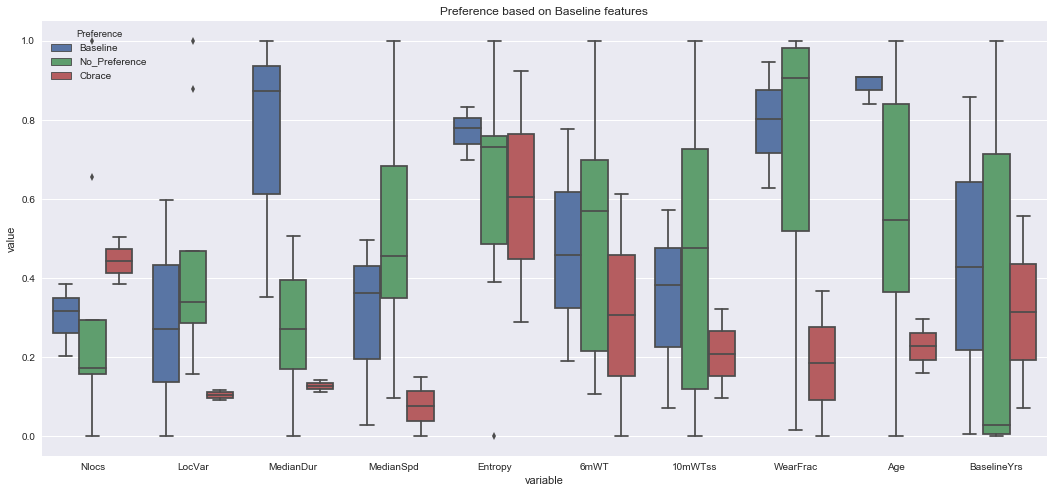

In [21]:
plt.figure(figsize=(18,8))
sns.boxplot(data=Databaselinemelt,x='variable',y='value',hue='Preference')
plt.title('Preference based on Baseline features')

## Pairwise correlations between baseline features and Cbrace Wear Time

In [ ]:
features = features+['Age','BaselineYrs']

In [22]:
plt.scatter(F['6mWT'],F['WearFrac'])

NameError: name 'F' is not defined

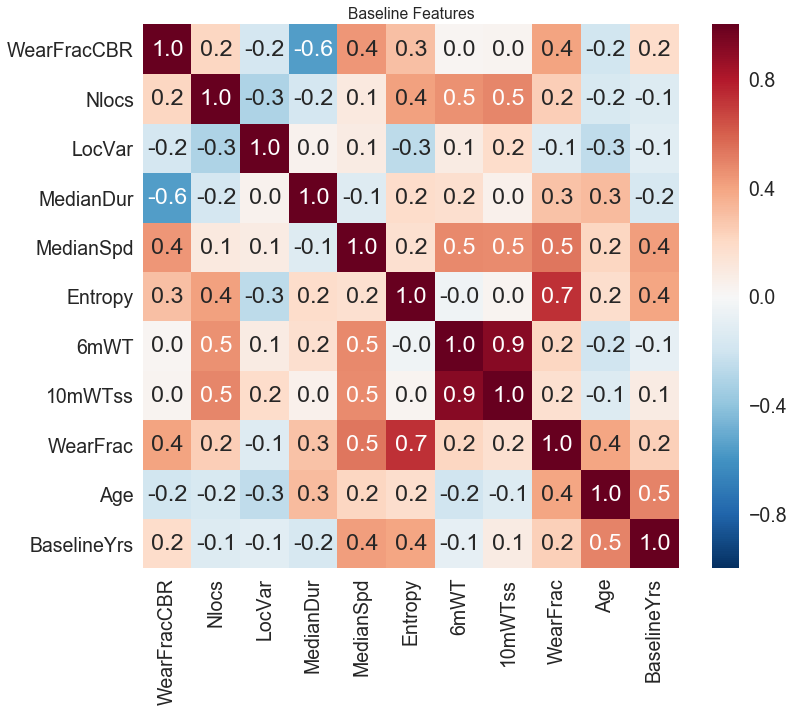

In [77]:
F = Featsubj[Featsubj['NewBrace']==0].reset_index(drop=True).copy()
outcome = Featsubj[Featsubj['NewBrace']==1]['WearFrac'].reset_index(drop=True).rename('WearFracCBR')
F = pd.concat((F,outcome),axis=1)
F=F.drop('NewBrace',axis=1)
F=F[['WearFracCBR']+features]
F.astype(float)
F.Age = pd.to_numeric(F.Age)
F.Nlocs = pd.to_numeric(F.Nlocs)
fcorr = F.corr()
plt.figure(figsize=(12,10))
sns.heatmap(data=fcorr,annot=True,fmt='.1f')
sns.set_context('talk',font_scale=1)
plt.title('Baseline Features')

In [98]:
features

['Nlocs',
 'LocVar',
 'MedianDur',
 'MedianSpd',
 'Entropy',
 '6mWT',
 '10mWTss',
 'WearFrac',
 'Age',
 'BaselineYrs']

In [101]:
 weardiff=Featsubj[Featsubj['NewBrace']==1]['WearFrac'].values-Featsubj[Featsubj['NewBrace']==0]['WearFrac'].values

In [102]:
df = Featsubj.loc[Featsubj['NewBrace']==0,features]
df['weardiff']=weardiff

In [103]:
df=df.drop('WearFrac',axis=1)
df.Nlocs = pd.to_numeric(df.Nlocs)
df.Age = pd.to_numeric(df.Age)

In [112]:
df['6mWTdiff']=Featsubj.loc[Featsubj['NewBrace']==1,'6mWT'].values-Featsubj.loc[Featsubj['NewBrace']==0,'6mWT'].values
df['10MWTdiff']=Featsubj.loc[Featsubj['NewBrace']==1,'10mWTss'].values-Featsubj.loc[Featsubj['NewBrace']==0,'10mWTss'].values

In [113]:
df.head()

,Nlocs,LocVar,MedianDur,MedianSpd,Entropy,6mWT,10mWTss,Age,BaselineYrs,weardiff,6mWTdiff,10MWTdiff
15,58,-4.000276,0.341667,1.254397,3.228757,246.46,0.70,65,60.0,-0.630898,-14.53,-0.01
16,94,-3.852770,0.329444,1.088038,3.832470,333.45,0.99,55,37.0,-0.080547,118.72,0.21
17,28,2.116022,0.368056,0.806337,1.987643,313.69,0.93,28,2.0,-0.113281,18.92,0.07
18,29,-3.216065,0.122222,1.072029,2.953799,119.18,0.44,72,70.0,0.107759,14.42,0.02
19,140,-4.645246,0.228333,1.486714,2.867158,443.20,1.22,52,0.5,-0.084355,68.94,-0.07


In [116]:
Featsubj.loc[Featsubj['NewBrace']==1,'6mWT','SubjID']

IndexingError: Too many indexers

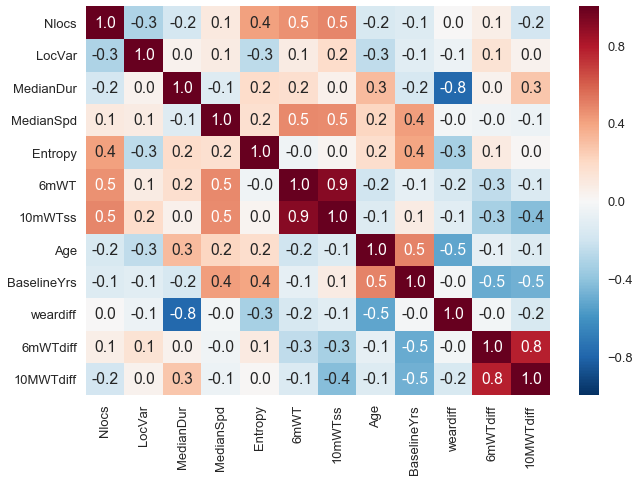

In [114]:
sns.heatmap(df.corr(),annot=True,fmt='.1f')

** We used 3 main types of features: Mobility (GPS derived), demographics (age, years using baseline device) and Clinical (6mWT and 10MWT)**

* There was no strong linear correlation (Pearson's r <= .6) between any of the baseline features and the usage (wear time ratio) of the new Cbrace device.


* The feature with the strongest correlation (r = 0.6) was the Median duration (stay) at a given location, which was negatively correlated with wear time. This could be indicative that subjects who wore the Cbrace more, were the ones who tended to use their baseline brace for shorter trips/visits.


* Interestingly there was no correlation at all (r = 0.0) with the Clinical tests using their baseline or Cbrace (see following plot). This is suggestive that performance with their baseline/Cbrace device was not correlated with usage of the Cbrace


* Wear fraction of their baseline device also did not correlate substantially (r = 0.4) with the wear fraction of the Cbrace across all subjects (however see other plot showing clustring of subjects into 3 groups)

## Pairwise correlations between Cbrace features and Cbrace Wear Time

In [72]:
features

['Nlocs',
 'LocVar',
 'MedianDur',
 'MedianSpd',
 'Entropy',
 '6mWT',
 '10mWTss',
 'WearFrac',
 'Age',
 'BaselineYrs']

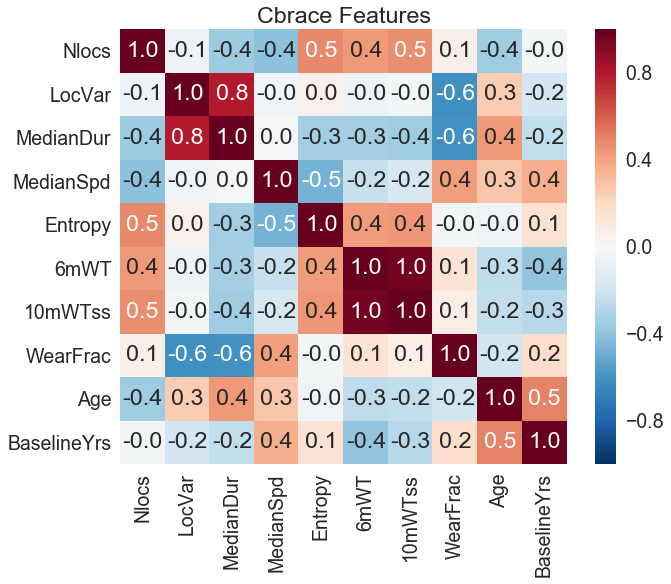

In [71]:
#correlations between Cbrace mobility features and wear time
F = Featsubj[Featsubj['NewBrace']==1].reset_index(drop=True).copy()
F=F.drop('NewBrace',axis=1)
F=F[features]
F['WearFrac'].rename('WearFracCBR')
F.astype(float)
F.Age = pd.to_numeric(F.Age)
F.Nlocs = pd.to_numeric(F.Nlocs)
fcorr = F.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data=fcorr,annot=True,fmt='.1f')
sns.set_context('talk',font_scale=1.5)
plt.title('Cbrace Features')

As before we do not see any significant correlation between Cbrace wear time and Cbrace features (clinical, mobility)